# Data Exploration Group Project


Group name: Cubic


Group leader:  ZHANG Qiqi  


Group members:  CHEN Yongyu,  LUO Jingwen  




# Video Games Sales Data Exploration


# 1. About Dataset

As one of the greatest inventions of the 21st century, the development trend of video games has been concerned by people. In recent years, the global game market has witnessed rapid growth, and the global game market is expected to reach a record $203.1 billion in 2022, up 5.4% year-on-year. At the same time, the number of players worldwide will cross the 3 billion mark. 

This data set includes games' name, game platforms released, game genre, publisher, sales by region, and global sales over the period 1980-2020. We want to analyze this video game data to find out some of the trends and significant changes in the game market.


Data Source:  http://www.vgchartz.com/gamedb/


# 2. Questions

1) Top 10 best selling games in the world 

2) Top 10 best selling platforms in the world 

3) Sales trends in different regions

4) Investigate if there is a change during the years in the sales of different platforms.

5) Investigate if there is a change during the years on the game releases on different platforms.

6) Investigate total global sales in each genre.


7) Investigate if there is a change in popularity of different game genres on different platforms during time.

# 3. Preliminary Analysis

In [ ]:
from google.colab import drive
drivePath = '/content/drive'   #please do not change
drive.mount(drivePath)

# Install the library on your environment
!pip install wget

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/HardCoreFatLady/AIDM7330-Data-Exploration-Group-Project/main/'       # github raw file 
doc = 'VideoGamesSales_Dataset.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
fileName = wget.download(fullURL, out = dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data/VideoGamesSales_Dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

#Load the CSV into a Pandas dataframe
data = pd.read_csv(fileName, encoding='UTF-8')
data.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

**Examining the attributes of the Data Frame (standard procedures)**

data.shape 

data.columns           (check the variables, like "names" in data)

data.isnull().sum()    (check whether there is null value)

data.info()

data.describe()        (descriptive statistics for numerical variables)

In [ ]:
data.shape

(16598, 11)

In [ ]:
a = data.columns
for i in range(0, len(a)):
  print('Name of Column',i+1,':',a[i])

Name of Column 1 : Rank
Name of Column 2 : Name
Name of Column 3 : Platform
Name of Column 4 : Year
Name of Column 5 : Genre
Name of Column 6 : Publisher
Name of Column 7 : NA_Sales
Name of Column 8 : EU_Sales
Name of Column 9 : JP_Sales
Name of Column 10 : Other_Sales
Name of Column 11 : Global_Sales


In [ ]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

#4. Results & Visualization

# 1) Top 10 best selling games in the world 


11007                        Wii Sports
3712                 Grand Theft Auto V
9327                  Super Mario Bros.
9715                             Tetris
5573                     Mario Kart Wii
11009                 Wii Sports Resort
7346           Pokemon Red/Pokemon Blue
1222            Call of Duty: Black Ops
1228     Call of Duty: Modern Warfare 3
6723              New Super Mario Bros.
Name: Name, dtype: object


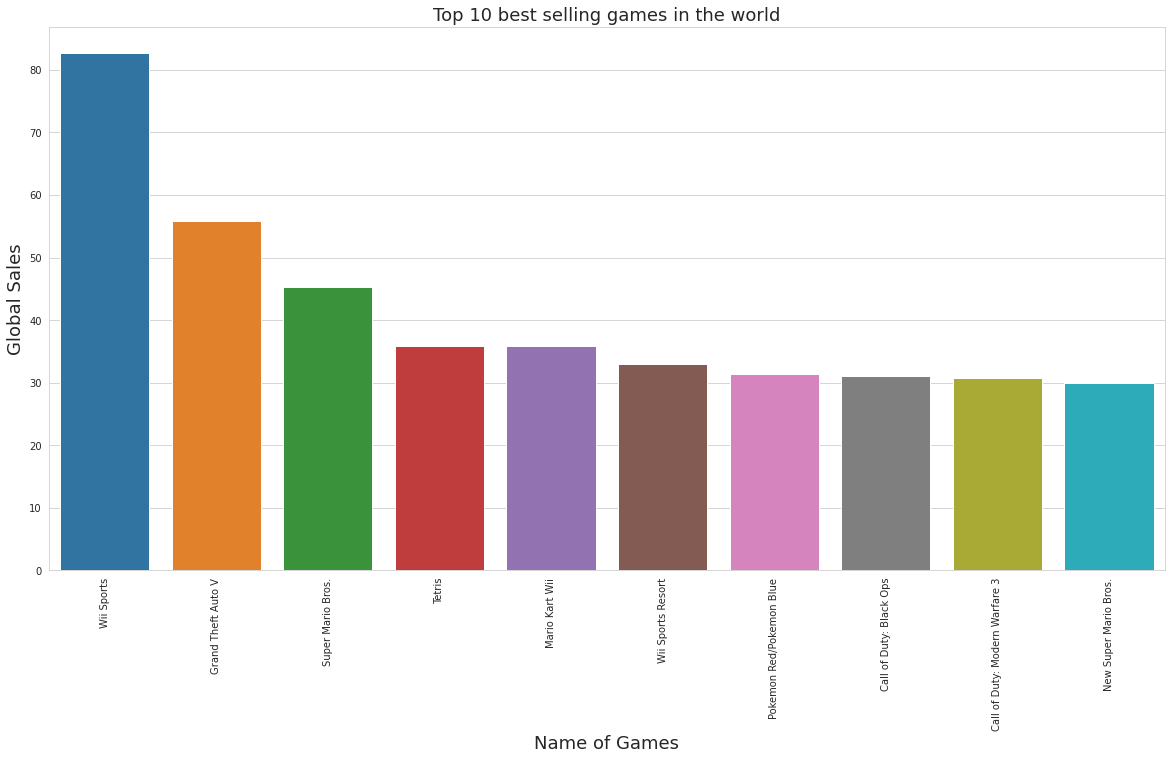

In [ ]:
data_rank = pd.DataFrame(data.groupby(['Name'])['Global_Sales'].sum().reset_index())
data_rank.sort_values(by=['Global_Sales'],ascending=False,inplace=True)


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

T10=sns.barplot(x=data_rank["Name"].head(10), y= data_rank['Global_Sales'].head(10), data=data_rank)
T10.set_xlabel("Name of Games",fontsize=18)
T10.set_ylabel("Global Sales",fontsize=18)
T10.set_title('Top 10 best selling games in the world',fontsize=18)
for item in T10.get_xticklabels():
    item.set_rotation(90)


data_rank.sort_values(by=['Global_Sales'],ascending=False,inplace=True)
x=data_rank["Name"].head(10)
print(x)       # print Top 10 best selling games


***Analysis***

As we can see from this chart, Wii Sports, produced by Japanese company Nintendo, is the number one selling game in the world, far surpassing New Super Mario Bros(NO.10) by 2.7 times.

# 2) Top 10 best selling platforms in the world


16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
6      GBA
19     PSP
18     PS4
13      PC
Name: Platform, dtype: object


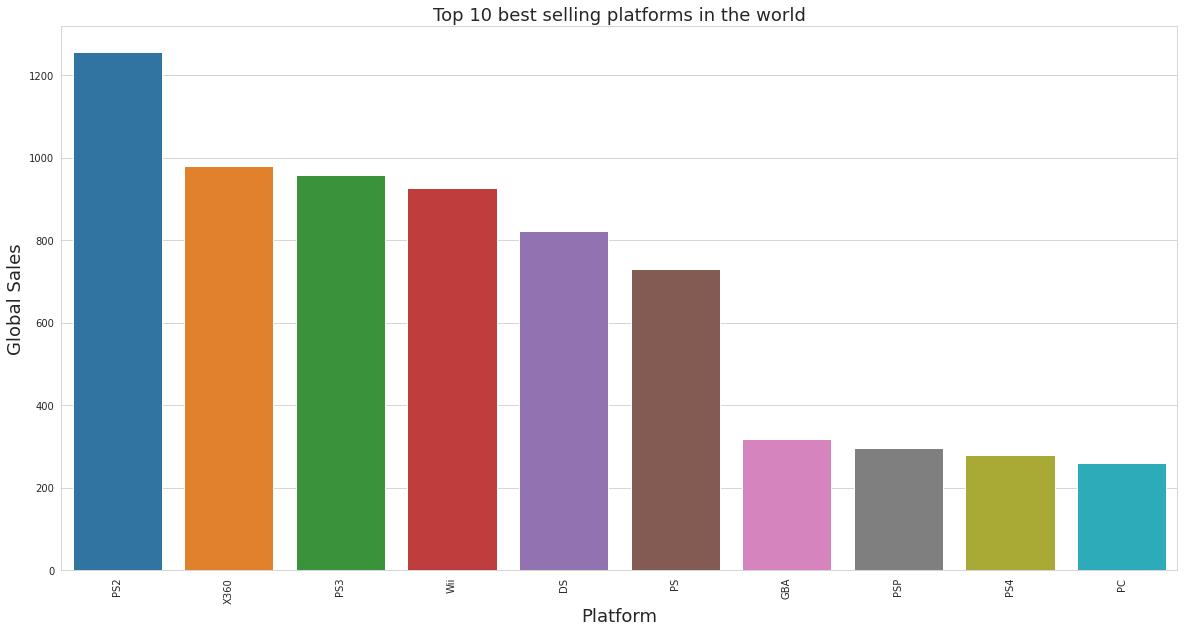

In [ ]:
data_rank = pd.DataFrame(data.groupby(['Platform'])['Global_Sales'].sum().reset_index())
data_rank.sort_values(by=['Global_Sales'],ascending=False,inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

T10=sns.barplot(x=data_rank["Platform"].head(10), y= data_rank['Global_Sales'].head(10), data=data_rank)
T10.set_xlabel("Platform",fontsize=18)
T10.set_ylabel("Global Sales",fontsize=18)
T10.set_title('Top 10 best selling platforms in the world',fontsize=18)
for item in T10.get_xticklabels():
    item.set_rotation(90)

data_rank.sort_values(by=['Global_Sales'],ascending=False,inplace=True)
x=data_rank["Platform"].head(10)
print(x)       # print Top 10 best selling Platforms

***Analysis***

As we can see from this chart, the top 10 selling platforms are: PS2, X360, PS3, Wii, DS, PS, GBA, PSP, PS4, PC. No. 1, the PS2, published by Electronic Arts, sold more than six times as many as the No.10 platform: PC.

# 3) Sales trends in different regions

In [ ]:
data[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']].describe()

NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000
mean       0.264667      0.146652      0.077782      0.048063      0.537441
std        0.816683      0.505351      0.309291      0.188588      1.555028
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.470000
max       41.490000     29.020000     10.220000     10.570000     82.740000

(<Figure size 1080x720 with 1 Axes>,
 Text(0.5, 1.0, 'Sales trends in different regions'))

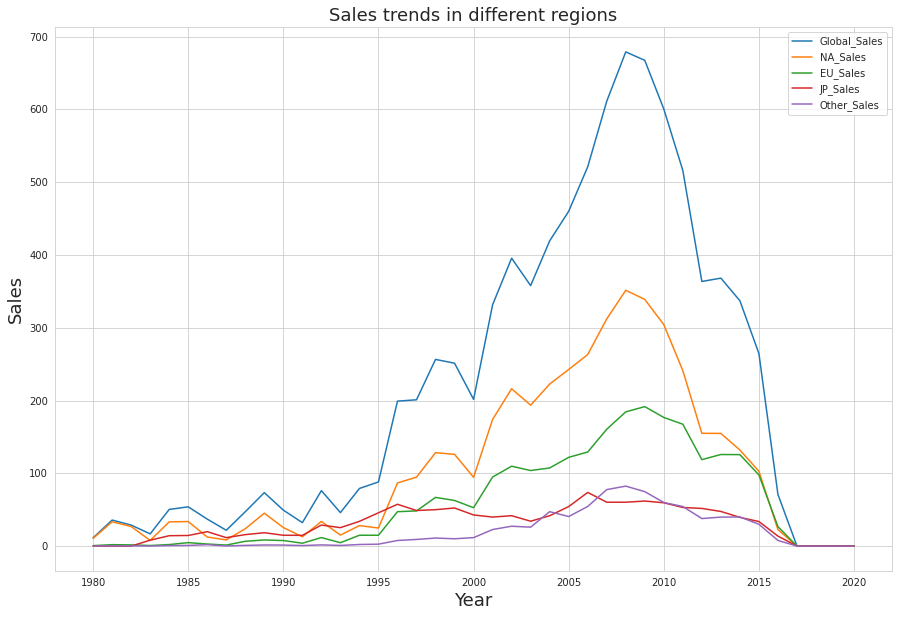

In [ ]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
NA_year = data.groupby(by=['Year'])['NA_Sales'].sum()
NA_year = NA_year.reset_index()
EU_year = data.groupby(by=['Year'])['EU_Sales'].sum()
EU_year = EU_year.reset_index()
JP_year = data.groupby(by=['Year'])['JP_Sales'].sum()
JP_year = JP_year.reset_index()
Other_year = data.groupby(by=['Year'])['Other_Sales'].sum()
Other_year = Other_year.reset_index()

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=data_year, x='Year', y='Global_Sales', label='Global_Sales', ax=ax)
sns.lineplot(data=NA_year, x='Year', y='NA_Sales', label='NA_Sales', ax=ax)
sns.lineplot(data=EU_year, x='Year', y='EU_Sales', label='EU_Sales', ax=ax)
sns.lineplot(data=JP_year, x='Year', y='JP_Sales', label='JP_Sales', ax=ax)
sns.lineplot(data=Other_year, x='Year', y='Other_Sales', label='Other_Sales', ax=ax)


fig, ax.set_xlabel("Year",fontsize=18)
fig, ax.set_ylabel("Sales",fontsize=18)
fig, ax.set_title('Sales trends in different regions',fontsize=18)

***Analysis***

First of all, we can intuitively see from the figure that the sales value of NA, EU, JP, Other and Global are highly correlated. This may be because if a game sells well in one region, it is more likely to sell globally, leading to higher sales elsewhere. Global sales is the total value of sales, which shows a general sales trend for all regions.

In particular, the correlation between sales in Japan and the rest of the region is not strong, especially between 1980 and 2006, which may indicate a difference in game preferences between Japan and the rest of the region.

# 4) Investigate if there is a change during the years in the sales of different platforms.

1.
Because the research is on the trend of different platforms, I get the information of the platform first, and I decided to use a line graph to represent the trend.
There are a large number of platforms, so the convenience cycle is carried out to obtain the sales volume trend of different platforms
Since there are 5 different region-wide sales data, a classification study is performed

In [ ]:
dataCopy=data.copy()
dataCopy.dropna(how='any',inplace=True)

In [ ]:
Platform = dataCopy.groupby('Platform').size()
print(Platform.index)
numPlatform = len(Platform)
print('num of platforms:',numPlatform) 

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')
num of platforms: 31


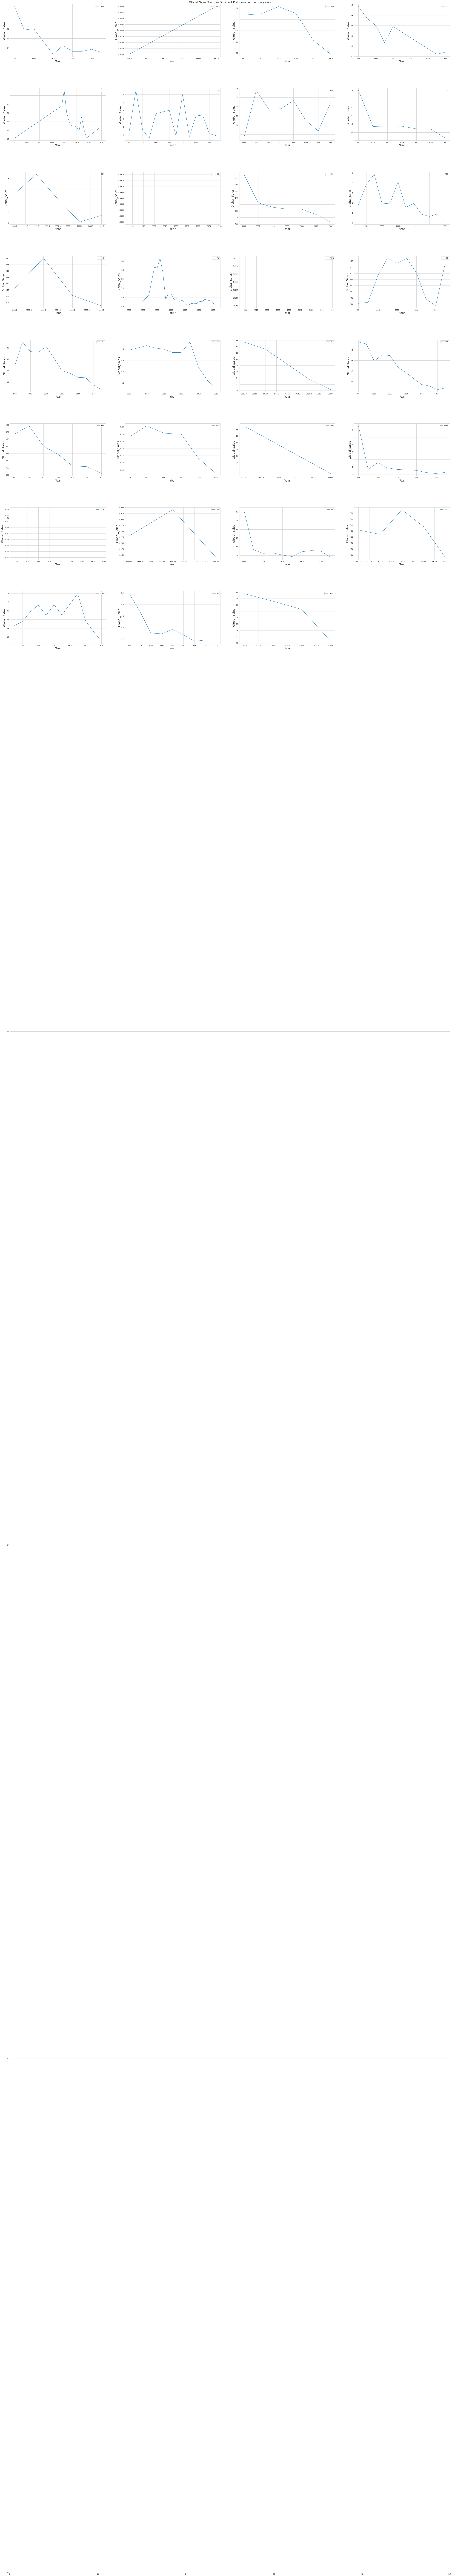

In [ ]:
fig = plt.figure(figsize=(50,300)) 
fig.subplots_adjust(hspace=0.6, wspace = 0.2)
plt.title('Global Sales Trend in Different Platforms across the years',fontsize=18)
n = 1
for P in Platform.index:
    ax = fig.add_subplot(numPlatform,4,n)
    x = dataCopy[dataCopy['Platform'] == P]
    dataCopy_pivot_g = x.pivot_table(values = 'Global_Sales', columns = 'Platform', index = 'Year')
    ax.plot(dataCopy_pivot_g)
    ax.set_xlabel('Year',fontsize=18)
    ax.set_ylabel('Global_Sales',fontsize=18)
    ax.legend([P],loc = 'upper right') #title
    n = n+1

plt.show()

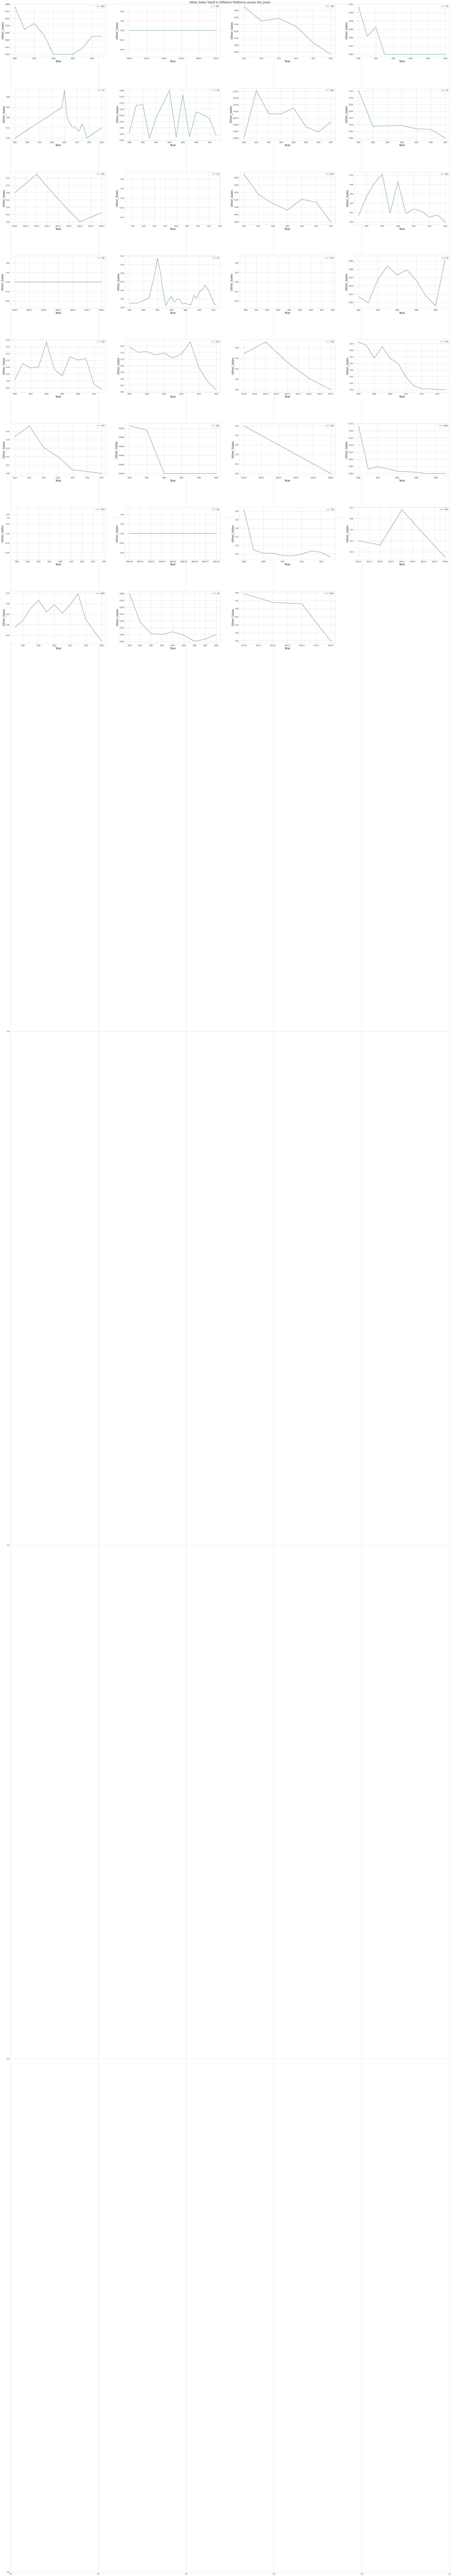

In [ ]:
fig = plt.figure(figsize=(50,300)) 
fig.subplots_adjust(hspace=0.6, wspace = 0.2)
plt.title('Other Sales Trend in Different Platforms across the years',fontsize=18)
n = 1
for P in Platform.index:
    ax = fig.add_subplot(numPlatform,4,n)
    x = dataCopy[dataCopy['Platform'] == P]
    dataCopy_pivot_g = x.pivot_table(values = 'Other_Sales', columns = 'Platform', index = 'Year')
    ax.plot(dataCopy_pivot_g)
    ax.set_xlabel('Year',fontsize=18)
    ax.set_ylabel('Other_Sales',fontsize=18)
    ax.legend([P],loc = 'upper right') #title
    n = n+1

plt.show()

2.In the sales data of North America, the sales volume of some platforms has experienced a peak, but almost all platforms have shown a downward trend, and the sales volume in recent years has also been lower than in previous years. Only the four platforms of PS, GEN, DS, and GBA have an upward trend, and the PS platform has reached the highest level in several years.


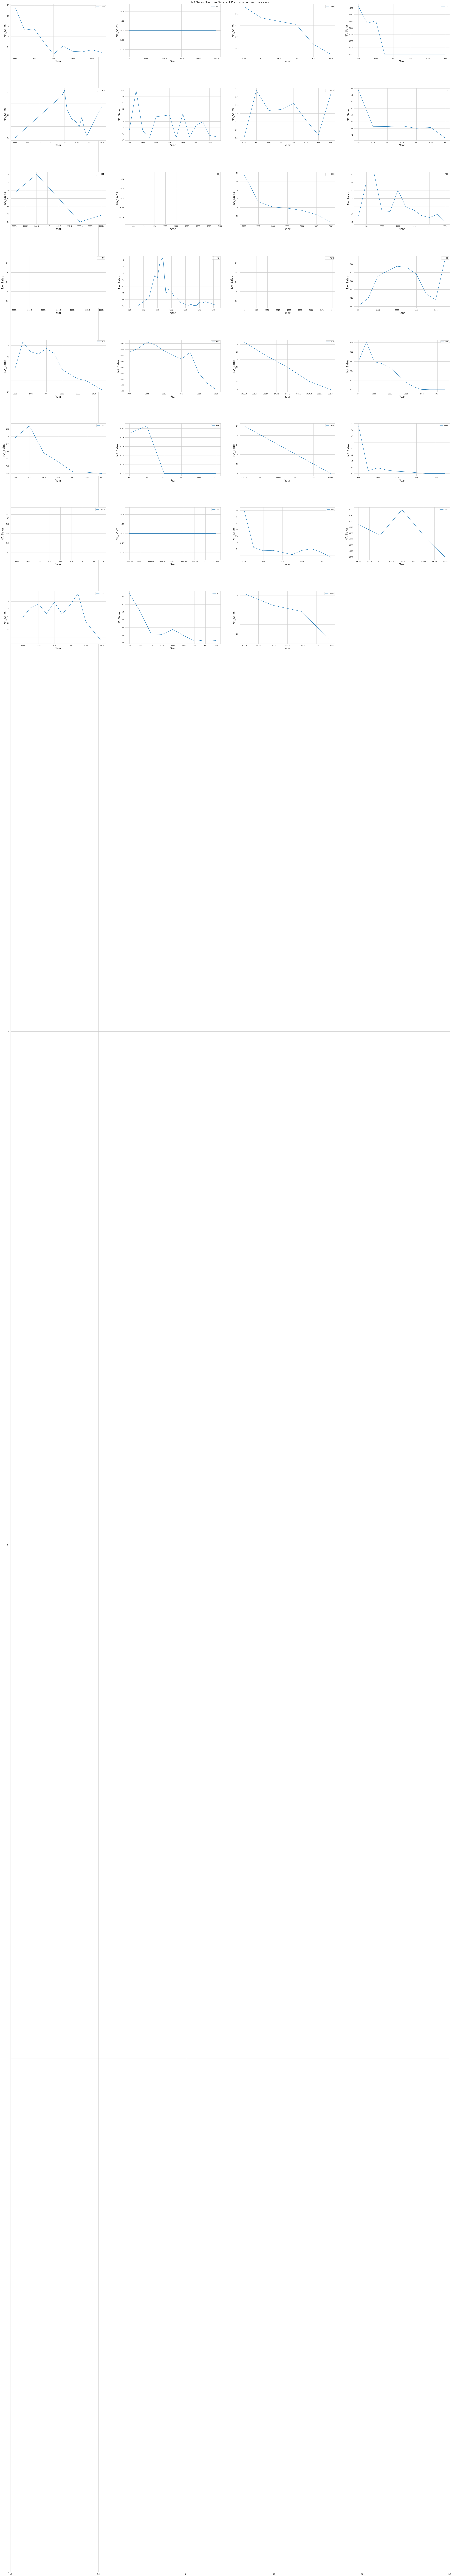

In [ ]:
fig = plt.figure(figsize=(50,300)) 
fig.subplots_adjust(hspace=0.6, wspace = 0.2)
plt.title('NA Sales  Trend in Different Platforms across the years',fontsize=18)
n = 1
for P in Platform.index:
    ax = fig.add_subplot(numPlatform,4,n)
    x = dataCopy[dataCopy['Platform'] == P]
    dataCopy_pivot_g = x.pivot_table(values = 'NA_Sales', columns = 'Platform', index = 'Year')
    ax.plot(dataCopy_pivot_g)
    ax.set_xlabel('Year',fontsize=18)
    ax.set_ylabel('NA_Sales',fontsize=18)
    ax.legend([P],loc = 'upper right') #title
    n = n+1

plt.show()

3.Observing their graphs, it is found that most of them show a downward trend, and only a very small number of platforms show an upward trend in sales.

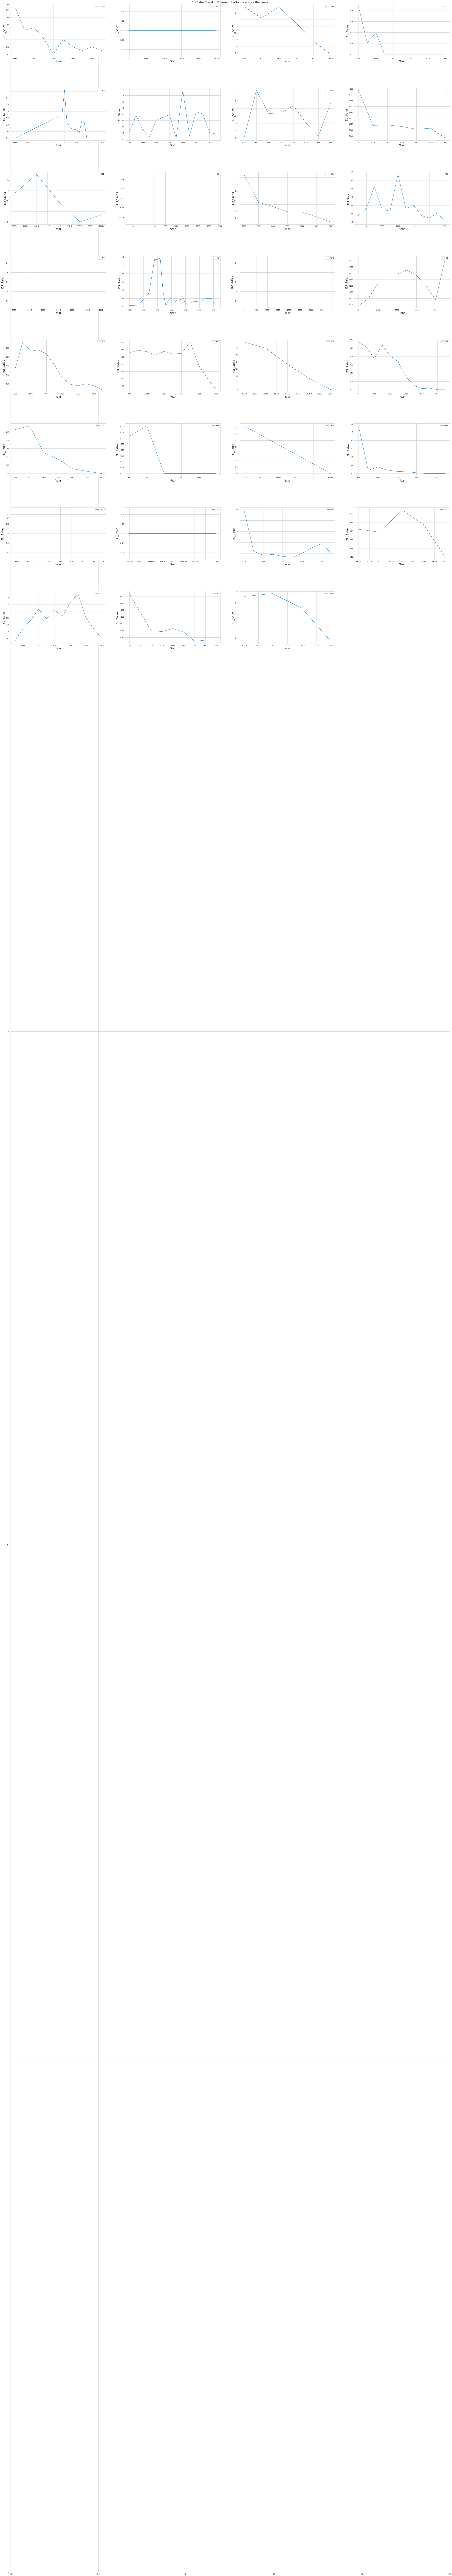

In [ ]:
fig = plt.figure(figsize=(50,300)) 
fig.subplots_adjust(hspace=0.6, wspace = 0.2)
plt.title('EU Sales Trend in Different Platforms across the years',fontsize=18)
n = 1
for P in Platform.index:
    ax = fig.add_subplot(numPlatform,4,n)
    x = dataCopy[dataCopy['Platform'] == P]
    dataCopy_pivot_g = x.pivot_table(values = 'EU_Sales', columns = 'Platform', index = 'Year')
    ax.plot(dataCopy_pivot_g)
    ax.set_xlabel('Year',fontsize=18)
    ax.set_ylabel('EU_Sales',fontsize=18)
    ax.legend([P],loc = 'upper right') #title
    n = n+1

plt.show()

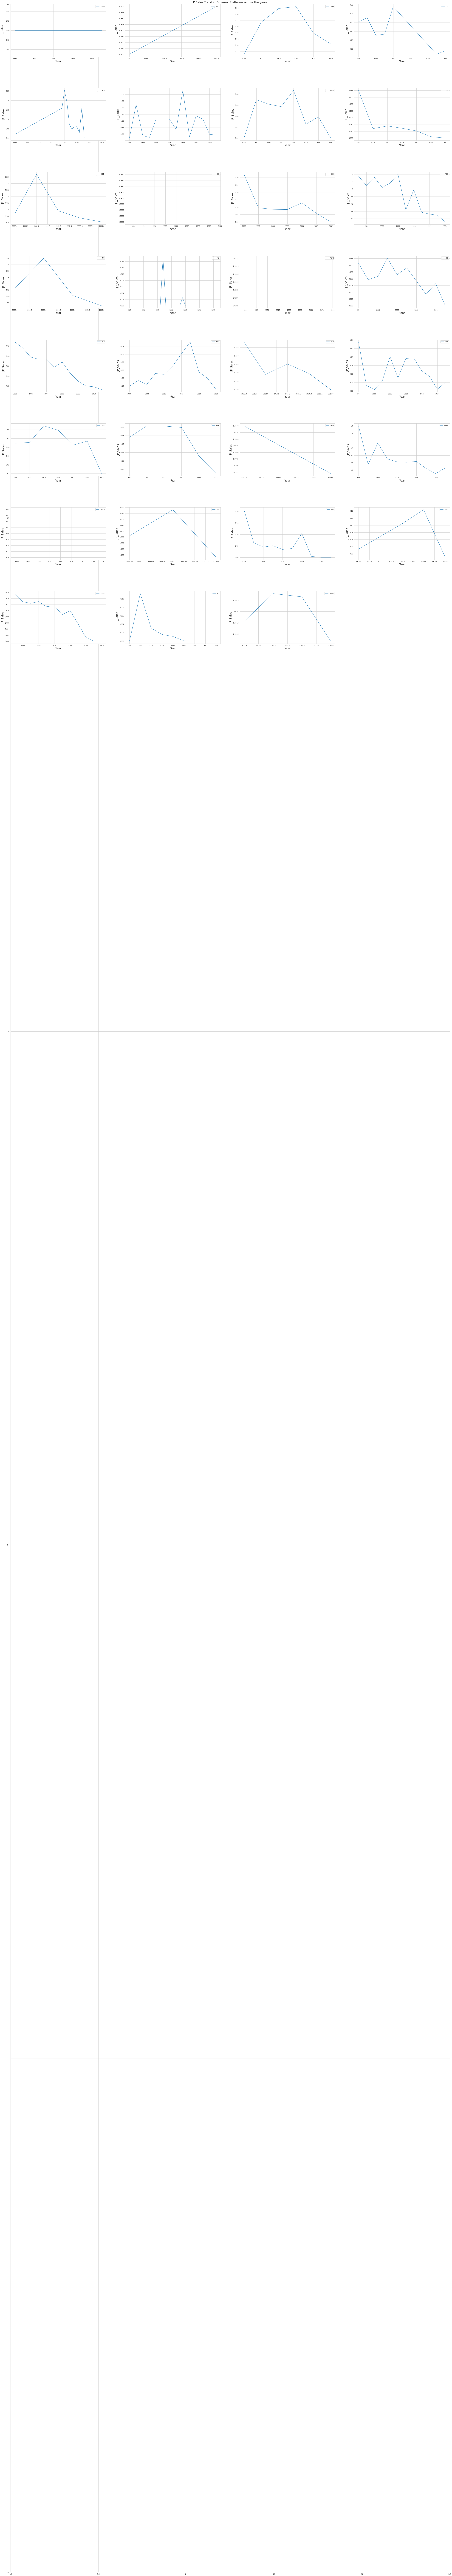

In [ ]:
fig = plt.figure(figsize=(50,300)) 
fig.subplots_adjust(hspace=0.6, wspace = 0.2)
plt.title('JP Sales Trend in Different Platforms across the years',fontsize=18)
n = 1
for P in Platform.index:
    ax = fig.add_subplot(numPlatform,4,n)
    x = dataCopy[dataCopy['Platform'] == P]
    dataCopy_pivot_g = x.pivot_table(values = 'JP_Sales', columns = 'Platform', index = 'Year')
    ax.plot(dataCopy_pivot_g)
    ax.set_xlabel('Year',fontsize=18)
    ax.set_ylabel('JP_Sales',fontsize=18)
    ax.legend([P],loc = 'upper right') #title
    n = n+1

plt.show()


4.I also used a histogram to represent the global sales of different platforms in different years. You can see the numerical changes in sales more intuitively. In recent years, the global sales of each platform have dropped significantly compared to the past.

In [ ]:
# showing the grouped means for one variable 
fig = plt.figure(figsize=(80,300)) 
fig.subplots_adjust(hspace=0.8, wspace = 0.2)
plt.title('Global_Sales Trend in Different Platforms across the years',fontsize=18)
n = 1
for P in Platform.index:
  ax = fig.add_subplot(numPlatform,4,n)
  x = dataCopy[dataCopy['Platform'] == P]
  data_df = x.groupby(by = 'Year')['Global_Sales'].sum()
  data_df.plot(kind = 'bar', rot = 0,title = P)
  n = n+1
plt.show()
 

#5) Investigate if there is a change during the years on the game releases on different platforms.

In [ ]:
fig = plt.figure(figsize=(80,300)) 
fig.subplots_adjust(hspace=0.8, wspace = 0.2)
plt.title('The game releases Trend in Different Platforms across the years',fontsize=18)
n = 1
for P in Platform.index:
  ax = fig.add_subplot(numPlatform,4,n)
  summarized_df =dataCopy[dataCopy['Platform'] == P].groupby(by = 'Year')['Rank'].count()
  summarized_df.plot(kind = 'bar', rot = 0,title=P)
  n = n+1
plt.show()


5.This line chart shows that the game release volume of different platforms has significantly changed every year. The release volume of some platforms has been lower than 100, and there has been no release date since 2000. PCFX, from 2005 to 2010, its annual circulation reached its peak, and the peak circulation of most platforms concentrated between 2000-2015.

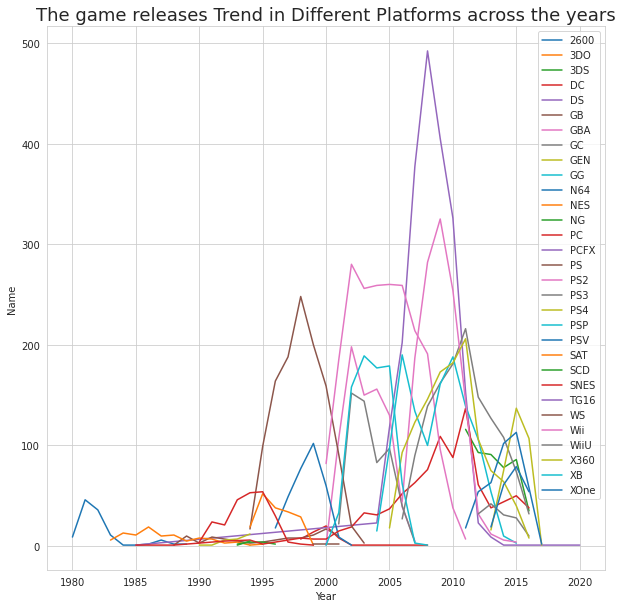

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('The game releases Trend in Different Platforms across the years',fontsize=18)
for P in Platform.index:
  d =dataCopy[dataCopy['Platform'] == P].groupby(by = 'Year')['Name'].count()
  d= d.reset_index()
  sns.lineplot(data=d, x='Year', y='Name', label=P, ax=ax)


# 6) Investigate total global sales in each genre  


In [ ]:
data_total = data.groupby('Genre', as_index=False)['Global_Sales'].sum()
data_total.nlargest(12,'Global_Sales')

Genre  Global_Sales
0         Action       1751.18
10        Sports       1330.93
8        Shooter       1037.37
7   Role-Playing        927.37
4       Platform        831.37
3           Misc        809.96
6         Racing        732.04
2       Fighting        448.91
9     Simulation        392.20
5         Puzzle        244.95
1      Adventure        239.04
11      Strategy        175.12

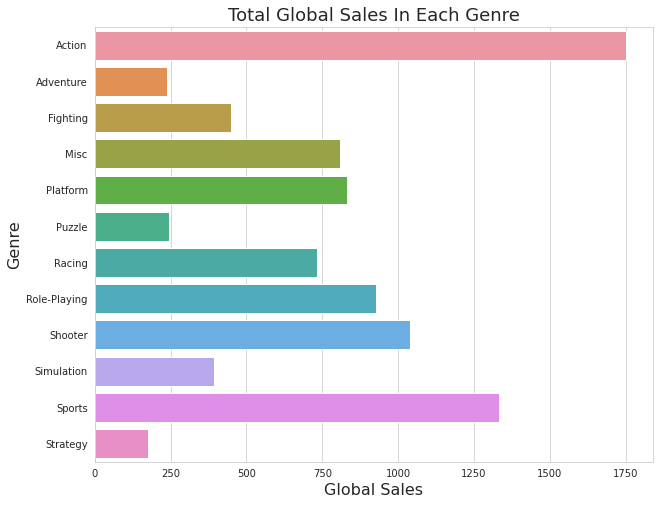

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=data_total, x='Global_Sales', y='Genre')
plt.title('Total Global Sales In Each Genre', fontsize=18)
plt.xlabel ('Global Sales', fontsize=16)
plt.ylabel ('Genre', fontsize=16)
plt.show()

***analysis***

1.Action games had the highest global sales with over 1750 (in millions)

2.Sports games had the second highest sales worldwide, and third were shooters. Only the first three categories of all game categories sold more than 1000 (in millions) worldwide

3.Strategy games have the lowest global sales. adventure and puzzle games sell a little more than strategy games, but all three categories sell less than 2500 (in millions) worldwide

4.The misce category and the platform category have the closest sales worldwide. They all sold around 8100 (in millions), which is close to half of the sales of the top-ranked action games.

# 7) Investigate if there is a change in popularity of different game genres on TOP10 platforms during time

In [ ]:
#The list of the top 10 platforms we got earlier
y =['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC']

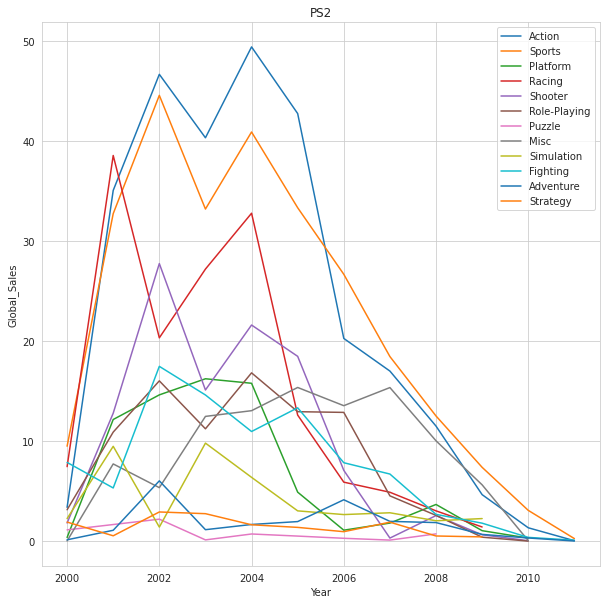

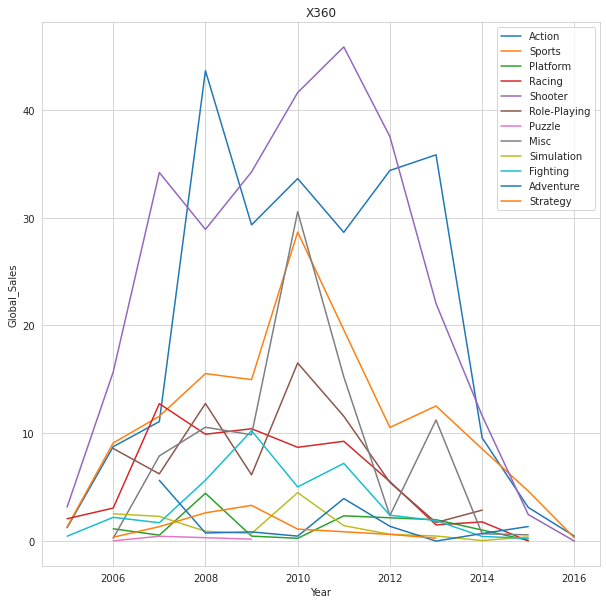

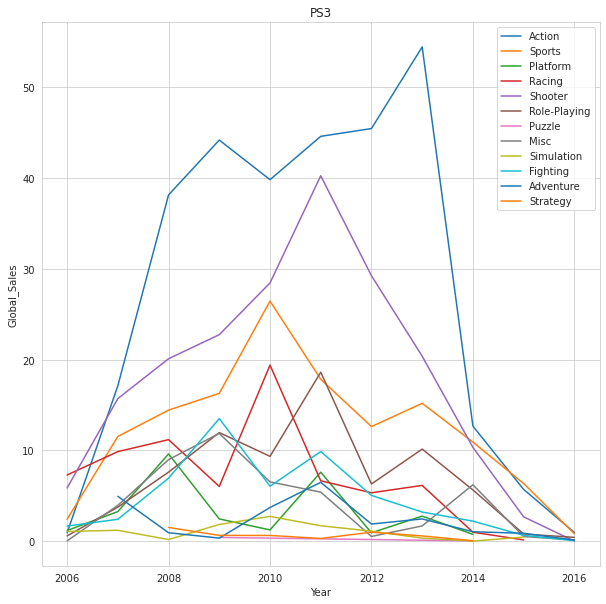

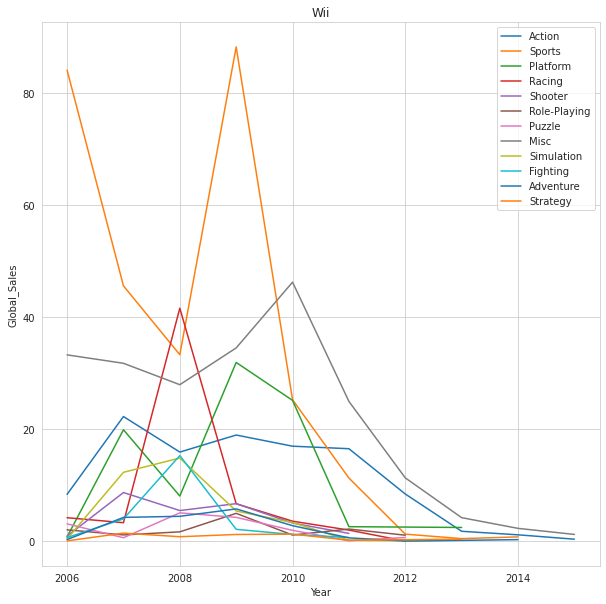

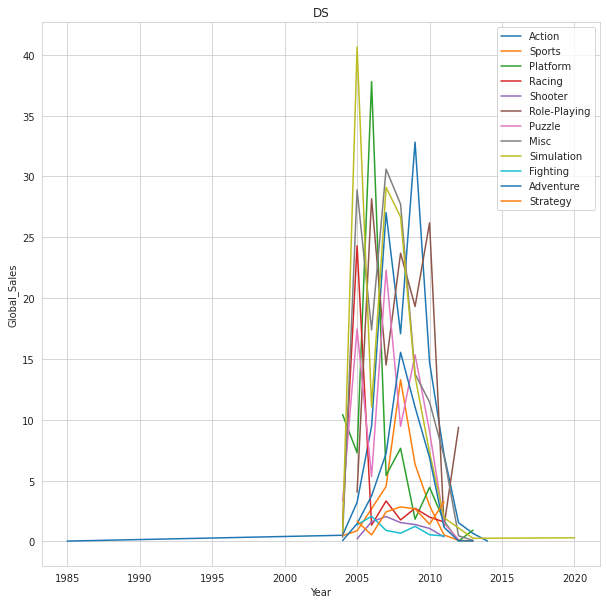

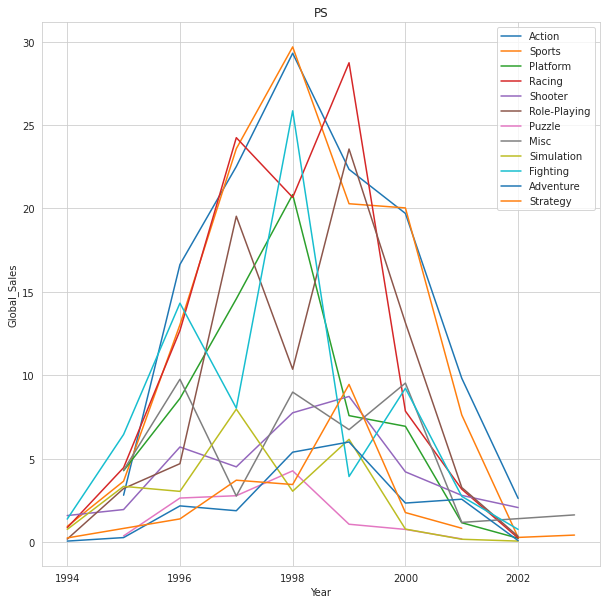

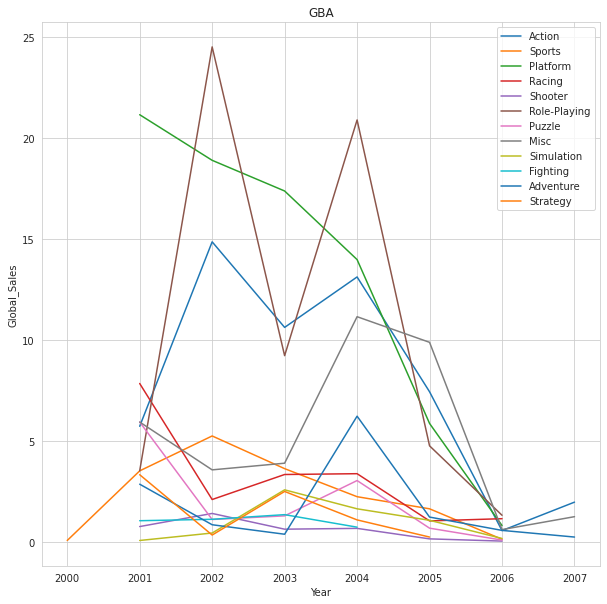

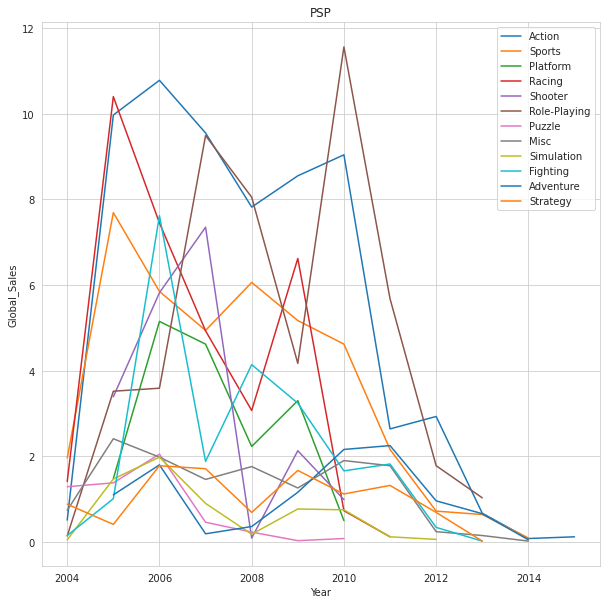

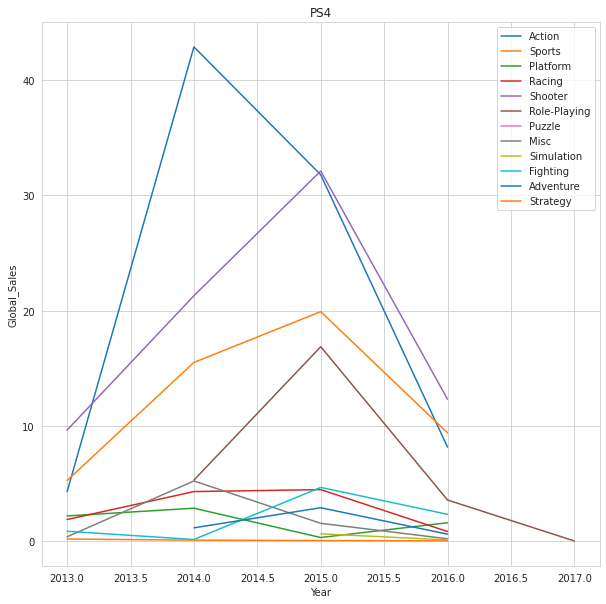

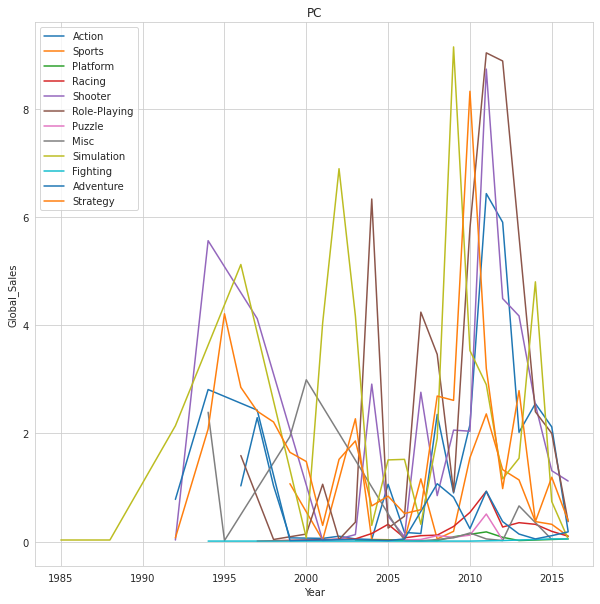

In [ ]:
#print the information about Top10 platform
for i in y:
  x = data[data['Platform'] == i]

#create different dataframes for each genre
  action = x[(x.Genre == "Action")]
  sports = x[(x.Genre == "Sports")]
  platform = x[(x.Genre == "Platform")]
  racing = x[(x.Genre == "Racing")]
  puzzle = x[(x.Genre == "Puzzle")]
  misc = x[(x.Genre == "Misc")]
  shooter = x[(x.Genre == "Shooter")]
  simulation = x[(x.Genre == "Simulation")]
  fighting = x[(x.Genre == "Fighting")]
  adventure = x[(x.Genre == "Adventure")]
  strategy = x[(x.Genre == "Strategy")]
  role = x[(x.Genre == "Role-Playing")]

#create linegraphic for each genre in terms of Global Sales
  action_year = action.groupby(by=['Year'])['Global_Sales'].sum()
  action_year = action_year.reset_index()
  sports_year = sports.groupby(by=['Year'])['Global_Sales'].sum()
  sports_year = sports_year.reset_index()
  platform_year = platform.groupby(by=['Year'])['Global_Sales'].sum()
  platform_year = platform_year.reset_index()
  racing_year = racing.groupby(by=['Year'])['Global_Sales'].sum()
  racing_year = racing_year.reset_index()
  puzzle_year = puzzle.groupby(by=['Year'])['Global_Sales'].sum()
  puzzle_year = puzzle_year.reset_index()
  misc_year = misc.groupby(by=['Year'])['Global_Sales'].sum()
  misc_year = misc_year.reset_index()
  shooter_year = shooter.groupby(by=['Year'])['Global_Sales'].sum()
  shooter_year = shooter_year.reset_index()
  simulation_year = simulation.groupby(by=['Year'])['Global_Sales'].sum()
  simulation_year = simulation_year.reset_index()
  fighting_year = fighting.groupby(by=['Year'])['Global_Sales'].sum()
  fighting_year = fighting_year.reset_index()
  adventure_year = adventure.groupby(by=['Year'])['Global_Sales'].sum()
  adventure_year = adventure_year.reset_index()
  strategy_year = strategy.groupby(by=['Year'])['Global_Sales'].sum()
  strategy_year = strategy_year.reset_index()
  role_year = role.groupby(by=['Year'])['Global_Sales'].sum()
  role_year = role_year.reset_index()

#finally the graphs, all in terms of sales
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.set_title(i)
  sns.lineplot(data=action_year, x='Year', y='Global_Sales', label='Action', ax=ax)
  sns.lineplot(data=sports_year, x='Year', y='Global_Sales', label='Sports', ax=ax)
  sns.lineplot(data=platform_year, x='Year', y='Global_Sales', label='Platform', ax=ax)
  sns.lineplot(data=racing_year, x='Year', y='Global_Sales', label='Racing', ax=ax)
  sns.lineplot(data=shooter_year, x='Year', y='Global_Sales', label='Shooter', ax=ax)
  sns.lineplot(data=role_year, x='Year', y='Global_Sales', label='Role-Playing', ax=ax)
  sns.lineplot(data=puzzle_year, x='Year', y='Global_Sales', label='Puzzle', ax=ax)
  sns.lineplot(data=misc_year, x='Year', y='Global_Sales', label='Misc', ax=ax)
  sns.lineplot(data=simulation_year, x='Year', y='Global_Sales', label='Simulation', ax=ax)
  sns.lineplot(data=fighting_year, x='Year', y='Global_Sales', label='Fighting', ax=ax)
  sns.lineplot(data=adventure_year, x='Year', y='Global_Sales', label='Adventure', ax=ax)
  sns.lineplot(data=strategy_year, x='Year', y='Global_Sales', label='Strategy', ax=ax)


PS2:  
1.	Most of the games on the PS2 platform have been liked by more and more people since 2000, but after 2005 game sales dropped rapidly. It can be seen that the popularity of each game declined.  
2.	Although global sales of games in the action and sports genres fluctuated more between 2002 and 2009, they remain two of the most popular games on this platform. 
3.	 The popularity of Racing and shooter type games ranked third and fourth respectively. 
4.	 Puzzle and strategy games are the least popular on this platform, and their popularity remains largely unchanged.


X360, PS3:  

1. The overall change in game genres is similar in both charts, with games on the platforms being popular since 2000. Probably from 2012 the popularity of each game has gradually decreased.
2. Games in the Action and Shooter categories continue to be the highest selling worldwide. Although the sales fluctuate and change, they are the two most popular games most of the time.
The second tier of popular games are Sports, Racing and Role-Playing, and Misc on the X360 platform.
4. The other game genres showed little change in popularity and were not as popular
  
Wii:    
1. sales of all game categories on this platform generally increased or remained the same between 2006 and 2008, except for the sports genre, which declined sharply in popularity.
2. However, in the two years after 2008, total worldwide sales of sports games increased sharply and even surpassed the sales of the most popular games in the past. It remained the most popular game on this platform until 2010 when it was overtaken by the Misc category.

DS:    
1. The platform appeared relatively early, but the games on the platform were widely popular between about 2004 and 2013.
2. The most popular types of games on this platform were Simulation and Platform in the early stage, and mainly Action and Role-Playing in the later stage.

PS:    
1. The games on this platform went through a process from the beginning of their popularity to their gradual decline between 1994 and 2002. In 1998, the popularity of games in the Action, Sports, Fighting and Platform genres reached its maximum.
2. The popularity of games in the Racing and Role-Playing genres fluctuated considerably between 1996 and 2000.

GBA:    
1. Except for Role-Playing, Platform, Action and Misc games, which have a large variation in popularity, the popularity of all other types of games on this platform has not changed much.
2. The sales of both Role-Playing and Action are fluctuating up and down, and the fluctuation of the Role-Playing category is greater and the popularity trend changes more.
3. The games of the platform genre gradually changed from the most popular to the least popular on the GBA platform.
  
PS4:    
1. the popularity of games on this platform has changed little at low levels except for action, shooter, sports and role-playing genres.
2. Action games were the most popular before 2015, and shooters after 2015.

PSP, PC:  
1. The sales of the games on these two platforms are actually not very high compared to other platforms, so although the sales of each genre fluctuate a lot, the magnitude of their changes actually become insignificant in comparison with the high sales. The overall popularity of the games on the platform is not high.

# 5. Conclusion

**4) Investigate if there is a change during the years in the sales of different platforms.**

In recent years, the sales of most game platforms in various regions have generally declined. From the perspective of the global sales of each platform, the peak of some platforms is concentrated aroud 1900, and some platforms were concentrated after 2000. In the future, there is also a trend of updating platforms, and some game platforms have become obsolete.

Judging from the changes in sales data, overall, the global sales of games on all platforms are decreasing, and games are less profitable than before.

**5) Investigate if there is a change during the years on the game releases on different platforms.**

The distribution of games on different platforms is decreasing yearly, and several platforms no longer distribute games. 

In recent years, the distribution of games on various platforms has significantly reduced, so the game’s creative ability and attractiveness to users will also decline. It echoes the decline in global sales of games.  
  
**6) Investigate total global sales in each genre.**
  
1.Action games had the highest global sales.  
2.Sports games had the second highest sales worldwide, and third were shooters.   
3.Strategy games have the lowest global sales.  
  4.The miscellaneous category and the platform category have the closest sales worldwide.

**7) Investigate if there is a change in popularity of different game genres on TOP10 platforms during time**
('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC’) 

**Conclusion**  
1.Overall, games on the 'X360', 'PS3', 'Wii' , 'DS', 'PSP', 'PS4' platforms basically went through a change from popular to unpopular between 2004 and 2016. The 'PS2' and 'GBA' platforms that went through this process were between 2000 and 2010.  
2.Action-type games are more popular on all platforms, except for the ‘wii’ platform.   
3.Sport type games perform well on ‘PS2’, ‘wii’, ‘ps’ platforms and moderately well on ‘X360’, ‘PS3’, ‘PSP’, ‘PS4’ platforms. Poor performance on other platforms.   
4.Shoot has better data on the top three platforms (PS2, X360, PS3)   
5.The popularity of each type on the Pc platform fluctuates greatly
